<a href="https://colab.research.google.com/github/moiloagert14/Gertiiey/blob/main/46533605_Moiloa_GEOG211_Prac6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 27.5 MB/s eta 0:00:00
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<built-in function getcwd>
/content/drive/Mydrive
/path/to/output
/path/to/figures
/path/to/tabular/data

         Date  Station_Number     Station_Name   Latitude  Longitude   Tmax  \
0  06/04/2024               1       4B Decline -24.966431  27.125312  29.57   
1  06/04/2024               2  Airport   RBCAA -28.738138  32.093333  22.10   
2  06/04/2024               3   Alexandra NAQI -26.107035  28.110264  25.35   
3  06/04/2024               4       Amersfoort -27.010278  29.867778  18.35   
4  06/04/2024               5   Amsterdamplein -33.769775  25.656261  40.60   

    Tmin   Tave  Hour_01  Hour_02  ...  Hour_14  Hour_15  Hour_16  Hour_17  \
0  15.98  22.43    18.20    17.89  ...    28.36    29.57    29.20    28.61   
1  19.14  20.07    22.10    20.54  ...    21.42    20

<ipython-input-1-753ca450fdc4>:92: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)


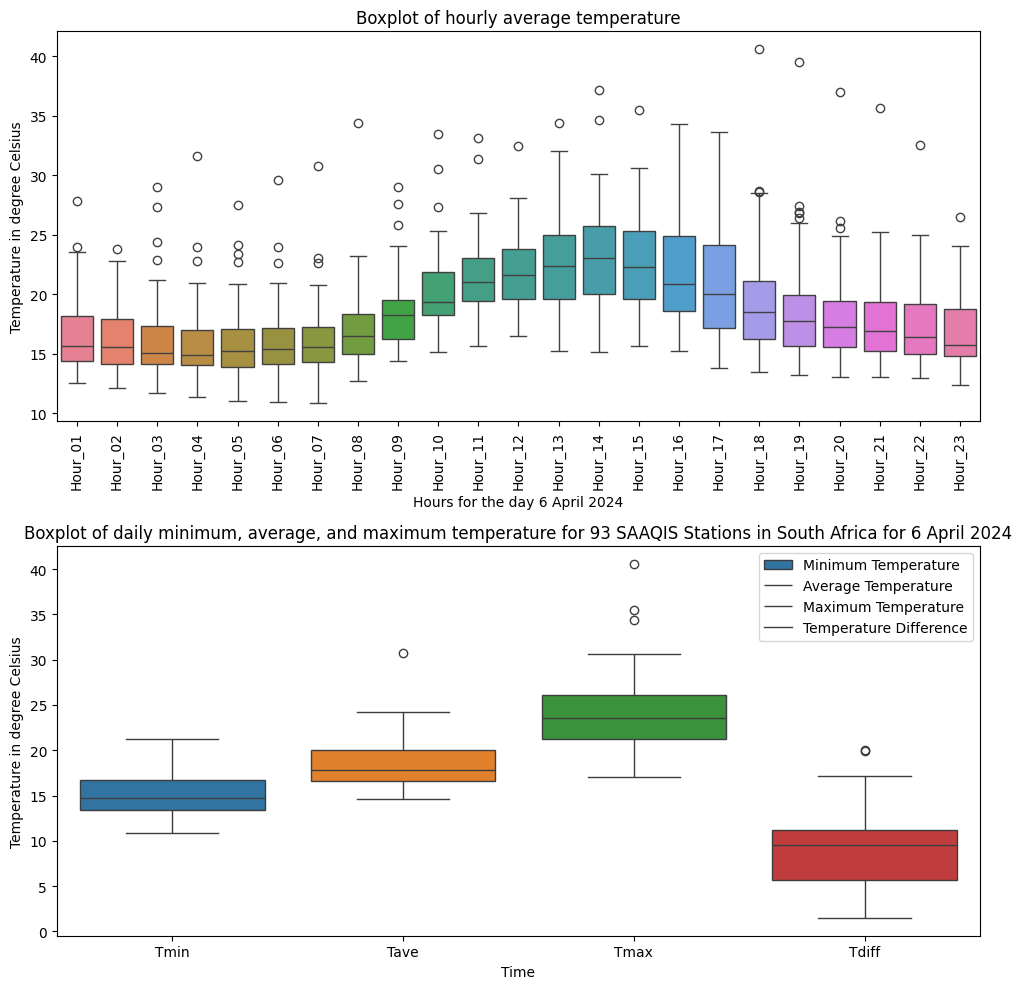

/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_1_states_provinces_lakes.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


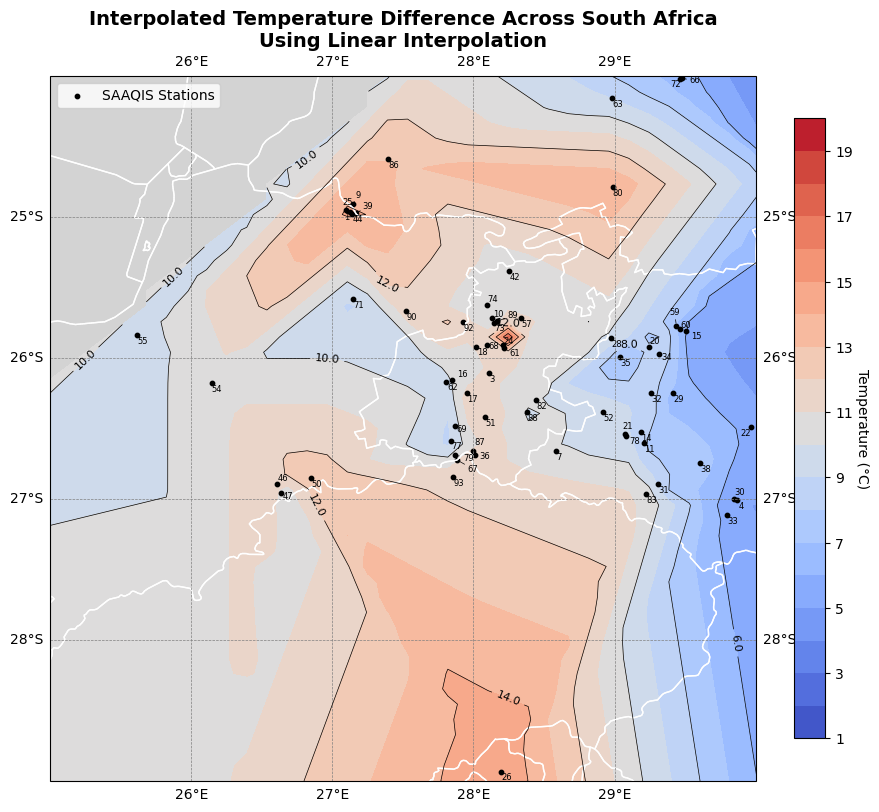

<Figure size 640x480 with 0 Axes>

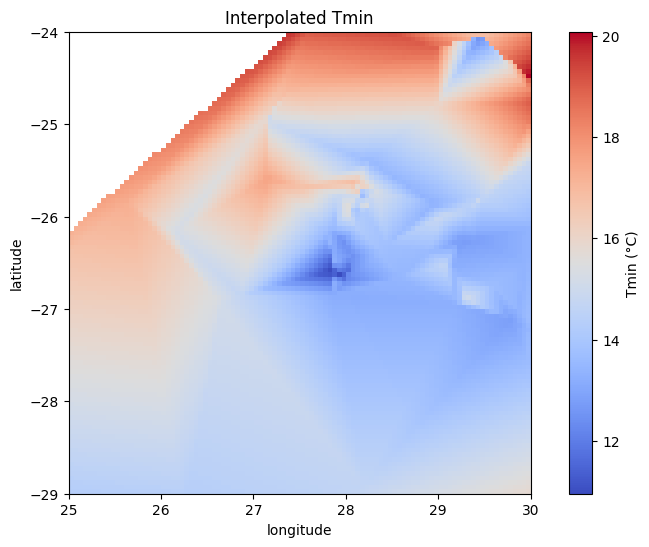

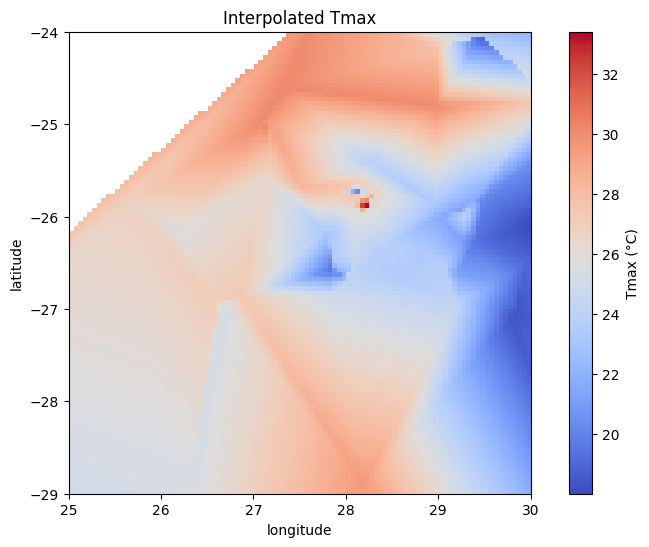

In [ ]:
# 46533605
# Gert
# Moiloa

!pip install cartopy
!pip install adjustText
!pip install seaborn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import scipy
import adjustText
from google.colab import drive
import oauth2client
import os
import seaborn as sns
from adjustText import adjust_text
from scipy.interpolate import griddata

#----------------------------------------------------------------------------------------
#Different directories
drive.mount('/content/drive')

current_working_dir = os.getcwd
print(current_working_dir)

new_working_dir = '/content/drive/Mydrive'
print(new_working_dir)

data_dir = "/content/drive/Mydrive/data"

output_dir = "/path/to/output"
print(output_dir)

fig_dir = "/path/to/figures"
print(fig_dir)

tab_dir = "/path/to/tabular/data"
print(tab_dir)
print()

#Reading in the Temperature data
data_file = '/content/drive/MyDrive/SAAQIS_Temperature_DailyMinMax.csv'
temp_data = pd.read_csv(data_file, encoding='utf-8')


print(temp_data.head())
temp_data.columns
temp_data.columns.tolist()
variable_names = temp_data.columns.tolist()
print(variable_names)
print()

#--------------------------------------------------------------------------------------------
#Addition of Tdiff
temp_data['Tdiff'] = temp_data['Tmax'] - temp_data['Tmin']
variable_names2 = temp_data.columns.tolist()
print(variable_names2)
print()

#--------------------------------------------------------------------------------------------------------
#Discriptive Statistics Analysis
variable_list = ['Tmax', 'Tmin', 'Tave', 'Hour_01', 'Hour_02', 'Hour_03', 'Hour_04', 'Hour_05',
                'Hour_06', 'Hour_07', 'Hour_08', 'Hour_09', 'Hour_10', 'Hour_11', 'Hour_12',
                'Hour_13', 'Hour_14', 'Hour_15', 'Hour_16', 'Hour_17', 'Hour_18', 'Hour_19',
                'Hour_20', 'Hour_21', 'Hour_22', 'Hour_23', 'Tdiff']
descriptive_stats = temp_data[variable_list].describe()

tab_dir = '/content/drive/MyDrive/'
output_file = os.path.join(tab_dir, "Practical6_Temp_Stats.csv")
descriptive_stats.to_csv(output_file, float_format='%.2f')

print("Descriptive statistics saved successfully.")
print()

#-----------------------------------------------------------------------------------------------------------------
#Visualisation
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

boxplot_variables1 = ['Hour_01', 'Hour_02', 'Hour_03', 'Hour_04', 'Hour_05', 'Hour_06',
                      'Hour_07', 'Hour_08', 'Hour_09', 'Hour_10', 'Hour_11', 'Hour_12',
                      'Hour_13', 'Hour_14', 'Hour_15', 'Hour_16', 'Hour_17', 'Hour_18',
                      'Hour_19', 'Hour_20', 'Hour_21', 'Hour_22', 'Hour_23']

sns.boxplot(data=temp_data[boxplot_variables1], ax=axes[0])
axes[0].set_xlabel('Hours for the day 6 April 2024')
axes[0].set_ylabel('Temperature in degree Celsius')
axes[0].set_title('Boxplot of hourly average temperature')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)

variables2 = ['Tmin', 'Tave', 'Tmax', 'Tdiff']

sns.boxplot(data=temp_data[variables2], ax=axes[1])
axes[1].set_xlabel('Time')
axes[1].set_ylabel('Temperature in degree Celsius')
axes[1].set_title('Boxplot of daily minimum, average, and maximum temperature for 93 SAAQIS Stations in South Africa for 6 April 2024')
axes[1].legend(['Minimum Temperature', 'Average Temperature', 'Maximum Temperature', 'Temperature Difference'])

plt.tight_layout()

fig_dir = '/content/drive/MyDrive/'
figure_file1 = os.path.join(fig_dir, 'Diurnal_Boxplot_Temp.png')
figure_file2 = os.path.join(fig_dir, 'Daily_Boxplot_Temp.png')
fig.savefig(figure_file1, dpi=300)
fig.savefig(figure_file2, dpi=300)
plt.show()
print()

#-------------------------------------------------------------------------------------------
#Conduction of linear interpolation analysis and plot data on mapgrid
x = np.linspace(temp_data['Longitude'].min(),
temp_data['Longitude'].max(), 100)

y = np.linspace(temp_data['Latitude'].min(),
temp_data['Latitude'].max(), 100)

X , Y = np.meshgrid(x, y)

Z_dif = griddata((temp_data['Longitude'], temp_data['Latitude']), temp_data['Tdiff'], (X, Y), method='linear')

plt.figure(figsize=(10, 10))

lllon = 25  # Lower left longitude
lllat = -29 # Lower left latitude
urlon = 30  # Upper right longitude
urlat = -24  # Upper right latitude

extended_X, extended_Y = np.meshgrid(np.linspace(lllon, urlon,100), np.linspace(lllat, urlat, 100))
extended_Z_dif = griddata((X.flatten(), Y.flatten()), Z_dif.flatten(),(extended_X, extended_Y), method='linear')

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([lllon, urlon, lllat, urlat], crs=ccrs.PlateCarree())
ax.coastlines(resolution='10m', linewidth=1, color='black')
ax.add_feature(cfeature.BORDERS.with_scale('10m'), linewidth=0.5,
linestyle=':', edgecolor='gray')
ax.add_feature(cfeature.STATES, edgecolor='white')
ax.add_feature(cfeature.LAND, color='lightgray')
ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', linestyle='--')

contour = plt.contourf(X, Y, Z_dif, cmap='coolwarm', levels=20,
transform=ccrs.PlateCarree())


cbar = plt.colorbar(contour, fraction=0.04, pad=0.05)
cbar.set_label('Temperature (°C)', rotation=270, labelpad=12)
ax.scatter(temp_data.Longitude, temp_data.Latitude, color='black', marker='o', s=10, transform=ccrs.PlateCarree(), label='SAAQIS Stations')

texts = []
for i, txt in enumerate(temp_data.Station_Number):
  if lllon <=temp_data.Longitude[i] <= urlon and lllat <= temp_data.Latitude[i] <=urlat: texts.append(ax.text(temp_data.Longitude[i],temp_data.Latitude[i], txt, fontsize=6, color='black', ha='left',va='center', transform=ccrs.PlateCarree()))
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='black',
lw=0.5))

isolines = plt.contour(X, Y, Z_dif, levels=10, colors='k',
linewidths=0.5, transform=ccrs.PlateCarree())

plt.clabel(isolines, fmt='%1.1f', inline=True, fontsize=8)
plt.title('Interpolated Temperature Difference Across South Africa\nUsing Linear Interpolation', fontsize=14, fontweight='bold')
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.legend()
plt.show()
plt.savefig('Interpolation_Tdiff.png', dpi=300)
print()
#------------------------------------------------------------------------------
#Tmin and Tmax interpolation
x = temp_data.Longitude
y = temp_data.Latitude
z_Tmin = temp_data.Tmin
z_Tmax = temp_data.Tmax

grid_lon, grid_lat = np.meshgrid(np.linspace(lllon, urlon, num=100), np.linspace(lllat, urlat, num=100))
grid_Tmin = griddata((x, y), z_Tmin, (grid_lon, grid_lat), method='linear')
grid_Tmax = griddata((x, y), z_Tmax, (grid_lon, grid_lat), method='linear')

plt.figure(figsize=(10, 6))
plt.imshow(grid_Tmin, extent=(lllon, urlon, lllat, urlat), origin='lower', cmap='coolwarm')
plt.colorbar(label='Tmin (°C)')
plt.title('Interpolated Tmin')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.show()

plt.figure(figsize=(10, 6))
plt.imshow(grid_Tmax, extent=(lllon, urlon, lllat, urlat), origin='lower', cmap='coolwarm')
plt.colorbar(label='Tmax (°C)')
plt.title('Interpolated Tmax')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.show()





# New Section